# Sentiment Analysis

In [1]:
# using Anaconda's base env
# import torch
# import torchtext

In [2]:
# https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sentiment_helpers import *
from KRCC import *
import datetime


In [3]:
path = "Processed Datasets/"

In [4]:
# update as more files are added

# health orgs
healthorg = pd.read_excel(path + "healthorg.xlsx", index_col=0)
healthorg = sentimentanalysis(healthorg, "tweet")

# left news
leftnews = pd.read_excel(path + "leftnews.xlsx", index_col=0)
leftnews = sentimentanalysis(leftnews, "tweet")

# right news
rightnews = pd.read_excel(path + "rightnews.xlsx", index_col=0)
rightnews = sentimentanalysis(rightnews, "tweet")



In [5]:
# right ind
rightind = pd.read_excel(path + "rightind.xlsx", index_col=0)
rightind = sentimentanalysis(rightind, 'tweet')

# left ind
leftind = pd.read_excel(path + "leftind.xlsx", index_col=0)
leftind = sentimentanalysis(leftind, 'tweet')

# Celebrities
celebrities = pd.read_excel(path + "celebrities.xlsx", index_col=0)
celebrities = sentimentanalysis(celebrities, "tweet")

In [6]:
# fake
fake = pd.read_excel(path + "fake.xlsx", index_col=0)
fake = sentimentanalysis(fake, 'text')

# real
real = pd.read_excel(path + "real.xlsx", index_col=0)
real = sentimentanalysis(real, 'text')

In [7]:
end_date = '2020-04-30'

healthorg = healthorg[healthorg["date"] <= pd.to_datetime(end_date)]
healthorg = healthorg[healthorg["date"] >= pd.to_datetime('2020-03-01')]

leftnews = leftnews[leftnews["date"] <= pd.to_datetime(end_date)]
leftnews = leftnews[leftnews["date"] >= pd.to_datetime('2020-03-01')]

rightnews = rightnews[rightnews["date"] <= pd.to_datetime(end_date)]
rightnews = rightnews[rightnews["date"] >= pd.to_datetime('2020-03-01')]

rightind = rightind[rightind["date"] <= pd.to_datetime(end_date)]
rightind = rightind[rightind["date"] >= pd.to_datetime('2020-03-01')]

leftind = leftind[leftind["date"] <= pd.to_datetime(end_date)]
leftind = leftind[leftind["date"] >= pd.to_datetime('2020-03-01')]

celebrities = celebrities[celebrities["date"] <= pd.to_datetime(end_date)]
celebrities = celebrities[celebrities["date"] >= pd.to_datetime('2020-03-01')]

fake = fake[fake["date"] <= pd.to_datetime(end_date)]
fake = fake[fake["date"] >= pd.to_datetime('2020-03-01')]

real = real[real["date"] <= pd.to_datetime(end_date)]
real = real[real["date"] >= pd.to_datetime('2020-03-01')]

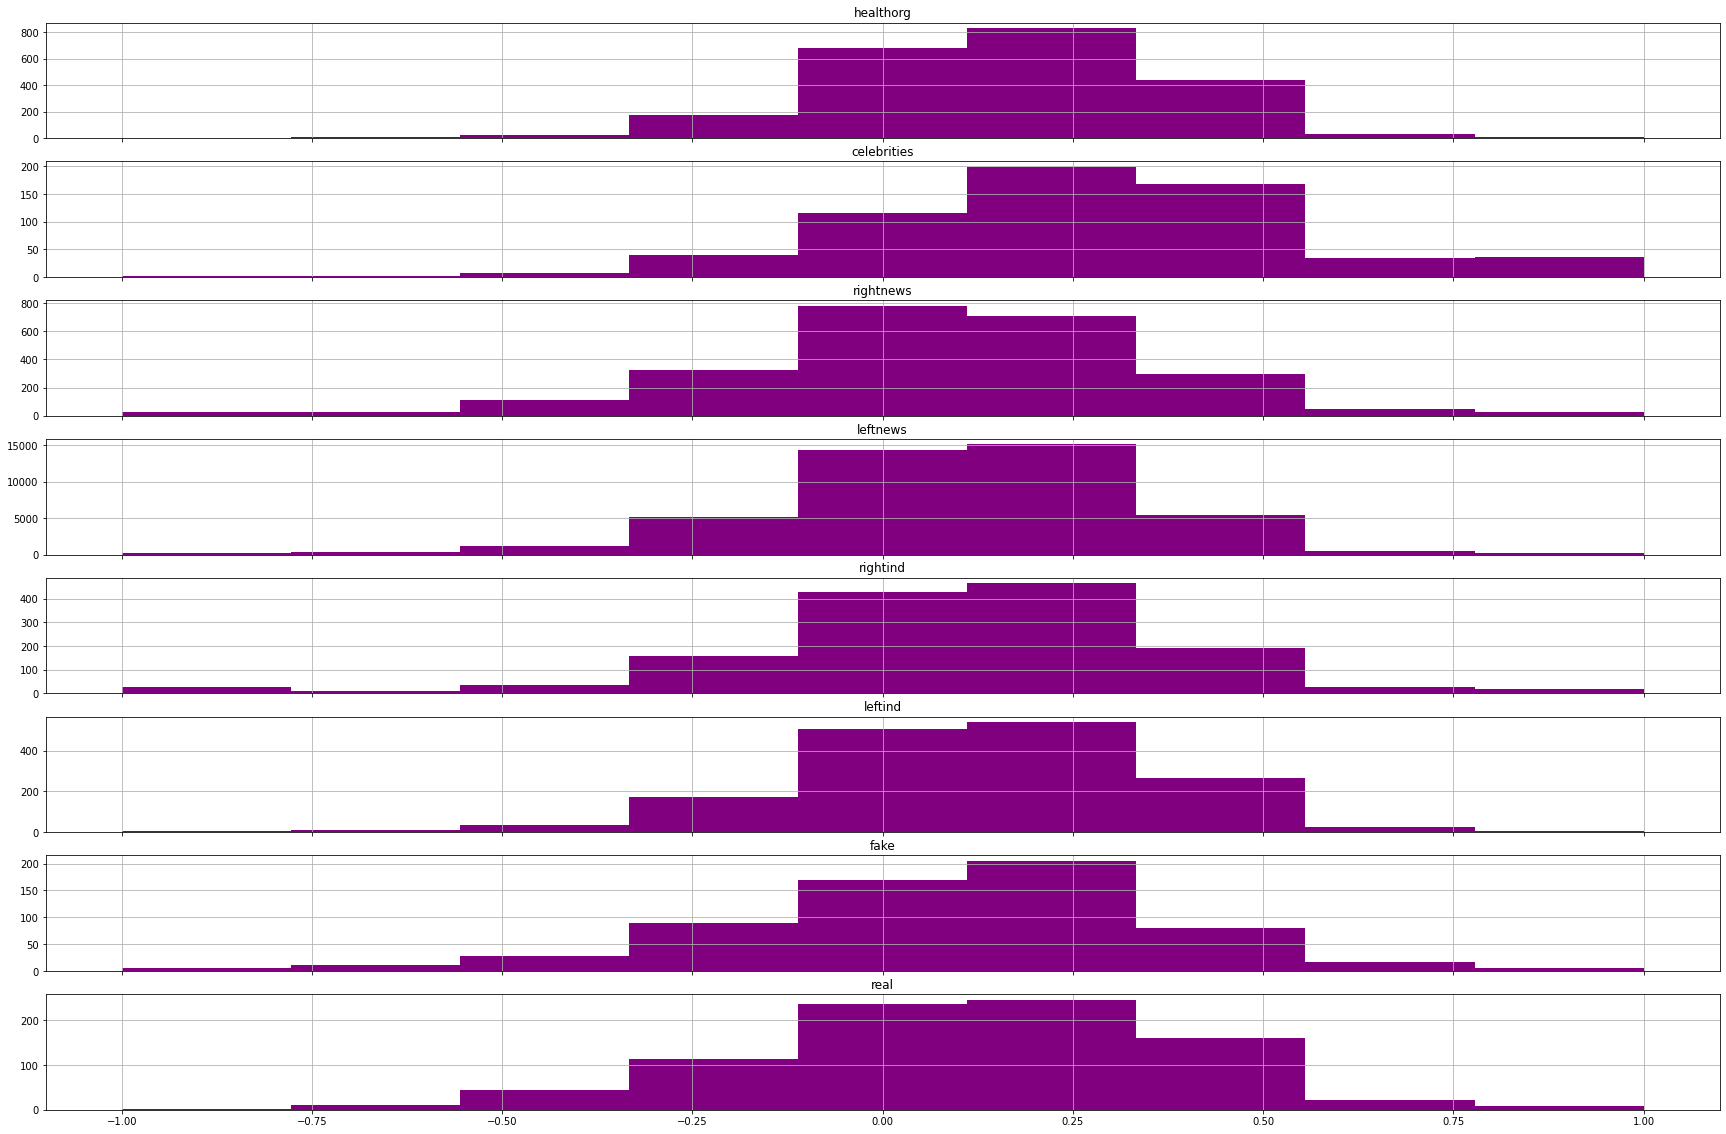

In [8]:
# histogram for overall sentiment

files = [healthorg, celebrities, rightnews, leftnews, rightind, leftind, fake, real]
names = ['healthorg', 'celebrities', 'rightnews', 'leftnews', 'rightind', 'leftind', 'fake', 'real']

fig, axes = plt.subplots(8, 1, figsize=[30, 20], sharex=True)
bins = np.linspace(-1, 1, 10)
for i in range(len(files)):
    col = files[i][files[i].polarity != 0].polarity
    col.hist(bins=bins, ax=axes[i], color="purple")
    axes[i].set_title(names[i])


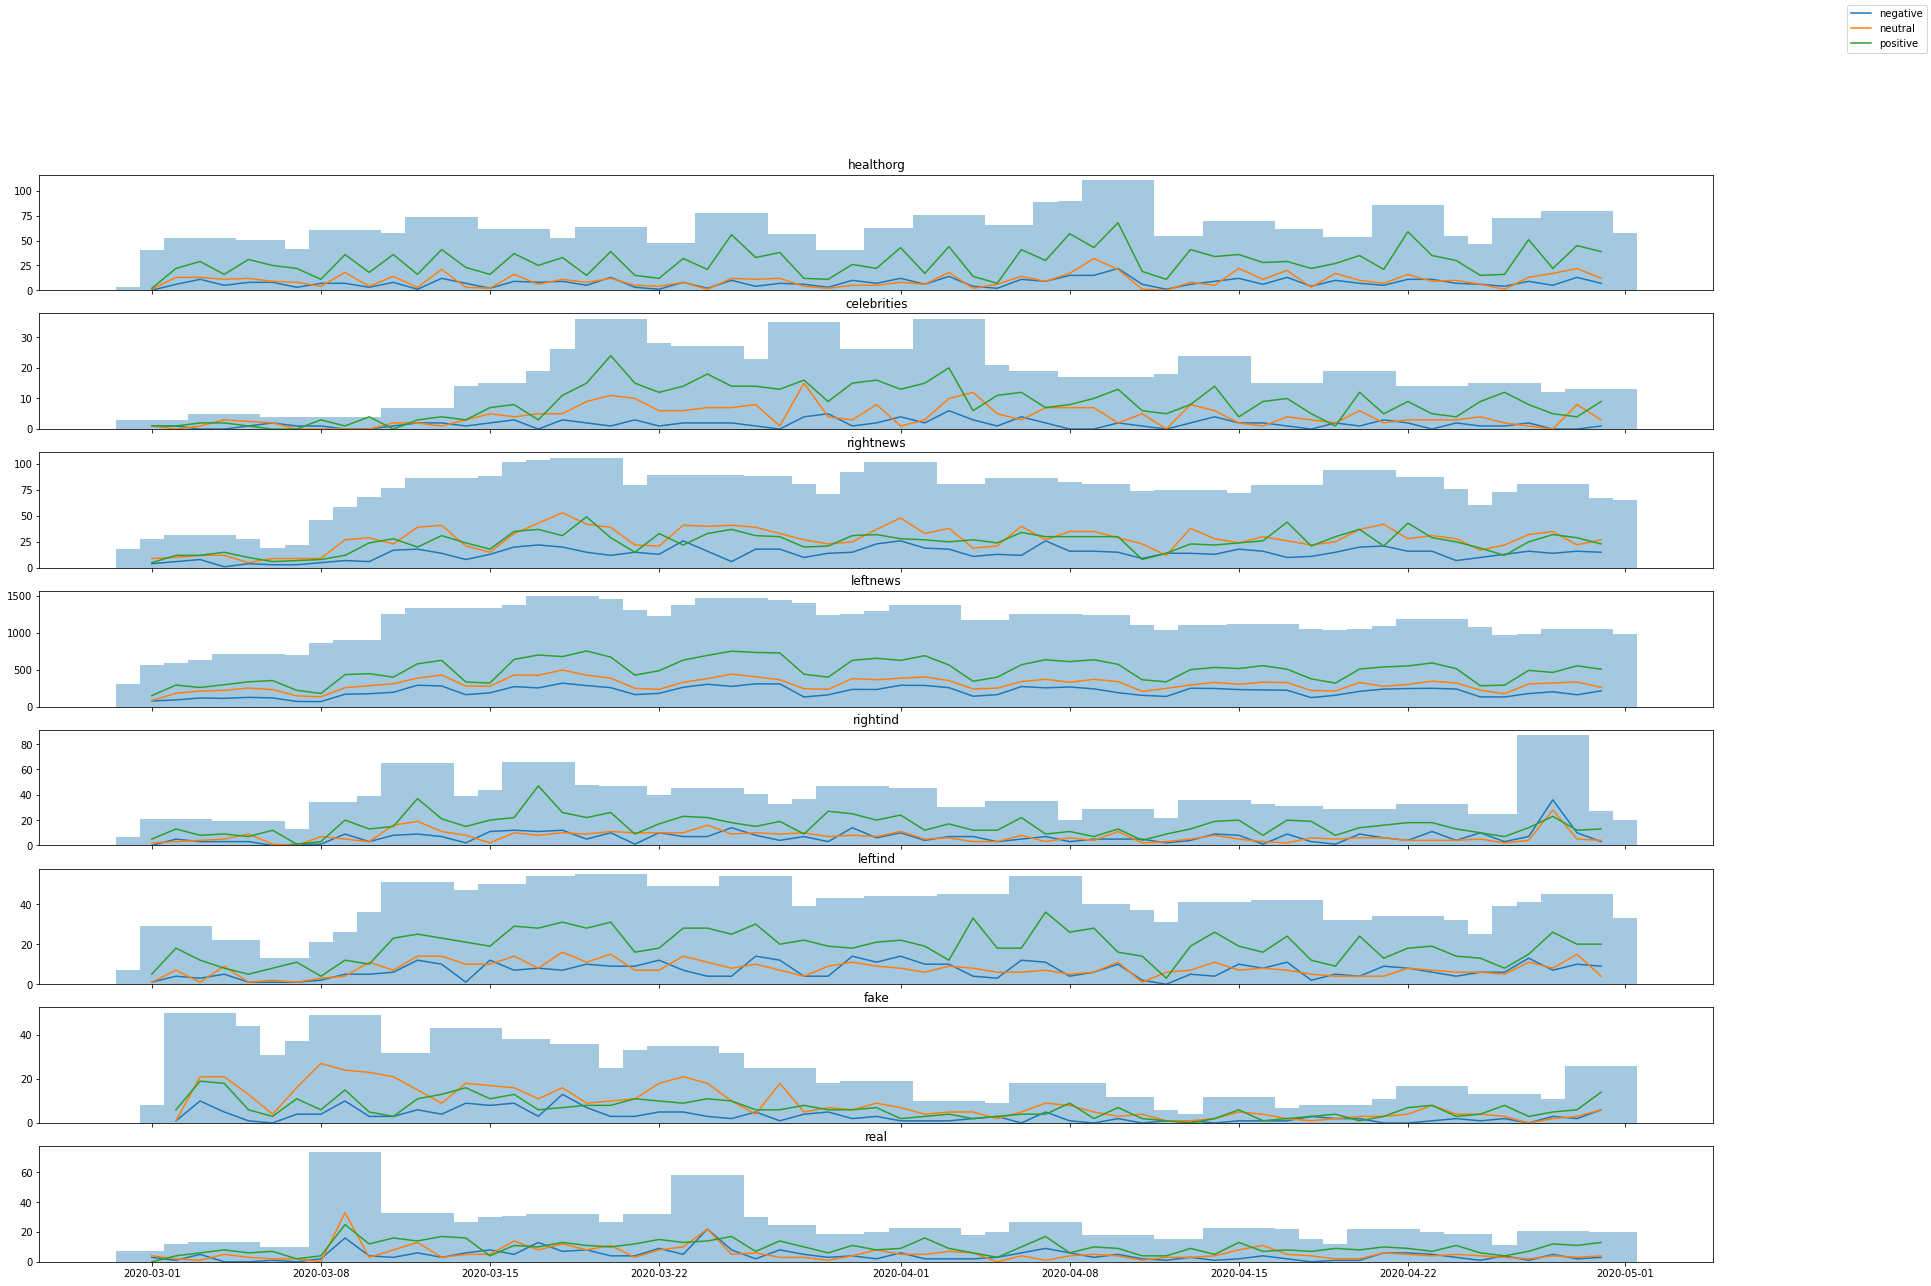

In [9]:
# plotting sentiment over time
# 1-day bins == overall # of tweets to see if magnitude contributes to sentiment spikes

import datetime
fig, axes = plt.subplots(8, 1, figsize=[30, 20], sharex=True)

for i in range(len(files)):
    if names[i] != 'fake':
        axes[i].plot(files[i].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0))
        bins = pd.Series(index=files[i].date, data=np.array(files[i].count)).resample('1D').count()
        axes[i].bar(bins.index.sort_values(), bins, width=3, color = '#A5C8E1')
        axes[i].set_title(names[i])
    else: # because fake has a really large spike near March 1
        test = files[i][files[i].date > datetime.datetime(2020,3,1)]
        axes[i].plot(test.groupby("date").sentiment.value_counts().unstack(level=1).fillna(0))
        bins = pd.Series(index=test.date, data=np.array(test.count)).resample('1D').count()
        axes[i].bar(bins.index.sort_values(), bins, width=3, color = '#A5C8E1')
        axes[i].set_title(names[i])

fig.legend(files[0].groupby("date").sentiment.value_counts().unstack(level=1))

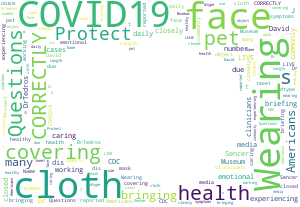

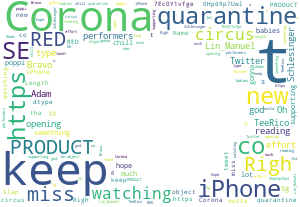

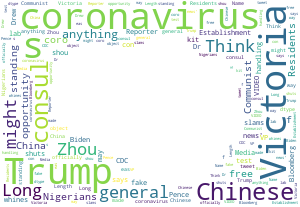

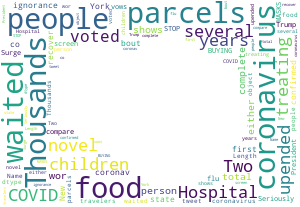

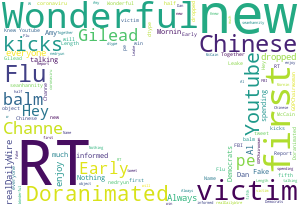

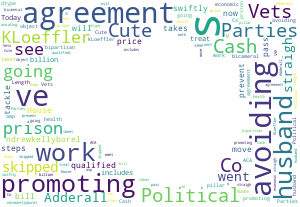

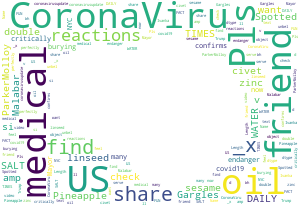

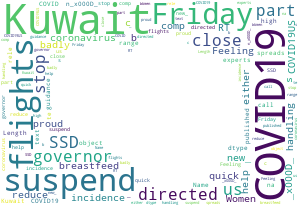

In [10]:
# word clouds

for i in range(len(files)):
    if "tweet" in files[i].columns:
        create_wordcloud(files[i].tweet, names[i])
    else:
        create_wordcloud(files[i].text, names[i])

In [11]:
end_date = '2020-04-30'

healthorg = healthorg[healthorg["date"] <= pd.to_datetime(end_date)]
healthorg = healthorg[healthorg["date"] >= pd.to_datetime('2020-03-01')]

leftnews = leftnews[leftnews["date"] <= pd.to_datetime(end_date)]
leftnews = leftnews[leftnews["date"] >= pd.to_datetime('2020-03-01')]

rightnews = rightnews[rightnews["date"] <= pd.to_datetime(end_date)]
rightnews = rightnews[rightnews["date"] >= pd.to_datetime('2020-03-01')]

rightind = rightind[rightind["date"] <= pd.to_datetime(end_date)]
rightind = rightind[rightind["date"] >= pd.to_datetime('2020-03-01')]

leftind = leftind[leftind["date"] <= pd.to_datetime(end_date)]
leftind = leftind[leftind["date"] >= pd.to_datetime('2020-03-01')]

celebrities = celebrities[celebrities["date"] <= pd.to_datetime(end_date)]
celebrities = celebrities[celebrities["date"] >= pd.to_datetime('2020-03-01')]

fake = fake[fake["date"] <= pd.to_datetime(end_date)]
fake = fake[fake["date"] >= pd.to_datetime('2020-03-01')]

real = real[real["date"] <= pd.to_datetime(end_date)]
real = real[real["date"] >= pd.to_datetime('2020-03-01')]


In [16]:
bins = '3D'
real_bins_freq = pd.Series(index=real.date, data=np.array(real.count)).resample(bins).count().sort_index()
fake_bins_freq = pd.Series(index=fake.date, data=np.array(fake.count)).resample(bins).count().sort_index()

In [17]:

healthorg = files[0].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
healthorg_bins = healthorg.resample(bins).sum()
celebrities = files[1].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
celebrities_bins = celebrities.resample(bins).sum()
rightnews = files[2].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
rightnews_bins = rightnews.resample(bins).sum()
leftnews = files[3].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
leftnews_bins = leftnews.resample(bins).sum()
rightind = files[4].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
rightind_bins = rightind.resample(bins).sum()
leftind = files[5].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
leftind_bins = leftind.resample(bins).sum()
fake = files[6].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
fake_bins = fake.resample(bins).sum()
real = files[7].groupby("date").sentiment.value_counts().unstack(level=1).fillna(0)
real_bins = real.resample(bins).sum()

In [19]:
print('-----------------real vs health org-----------------')
print("positive")
krcc_test(real_bins_freq, healthorg_bins['positive'])
print("neutral")
krcc_test(real_bins_freq, healthorg_bins['neutral'])
print("negative")
krcc_test(real_bins_freq, healthorg_bins['negative'])

print('\n-----------------real vs celebrities-----------------')
print("positive")
krcc_test(real_bins_freq, celebrities_bins['positive'])
print("neutral")
krcc_test(real_bins_freq, celebrities_bins['neutral'])
print("negative")
krcc_test(real_bins_freq, celebrities_bins['negative'])

print('\n-----------------real vs rightnews-----------------')
print("positive")
krcc_test(real_bins_freq, rightnews_bins['positive'])
print("neutral")
krcc_test(real_bins_freq, rightnews_bins['neutral'])
print("negative")
krcc_test(real_bins_freq, rightnews_bins['negative'])

print('\n-----------------real vs leftnews-----------------')
print("positive")
krcc_test(real_bins_freq, leftnews_bins['positive'])
print("neutral")
krcc_test(real_bins_freq, leftnews_bins['neutral'])
print("negative")
krcc_test(real_bins_freq, leftnews_bins['negative'])

print('\n-----------------real vs rightind-----------------')
print("positive")
krcc_test(real_bins_freq, rightind_bins['positive'])
print("neutral")
krcc_test(real_bins_freq, rightind_bins['neutral'])
print("negative")
krcc_test(real_bins_freq, rightind_bins['negative'])

print('\n-----------------real vs leftind-----------------')
print("positive")
krcc_test(real_bins_freq, leftind_bins['positive'])
print("neutral")
krcc_test(real_bins_freq, leftind_bins['neutral'])
print("negative")
krcc_test(real_bins_freq, leftind_bins['negative'])

-----------------real vs health org-----------------
positive
KRCC = 0.11031206779102297
p value = 0.48675573277863615
neutral
KRCC = 0.053013433378237246
p value = 0.7391923656425397
negative
KRCC = 0.07411226398565085
p value = 0.6472230019460856

-----------------real vs celebrities-----------------
positive
KRCC = 0.22115640206268516
p value = 0.16404673809449655
neutral
KRCC = 0.1791898877033687
p value = 0.26205775571764245
negative
KRCC = 0.1932522634962844
p value = 0.24317193168336226

-----------------real vs rightnews-----------------
positive
KRCC = 0.45784328826659443
p value = 0.004037146524744572
neutral
KRCC = 0.5035985703503223
p value = 0.0014983200652632165
negative
KRCC = 0.33416492571709294
p value = 0.036538673297533616

-----------------real vs leftnews-----------------
positive
KRCC = 0.5107413114018453
p value = 0.0012269289434954519
neutral
KRCC = 0.5775672773796569
p value = 0.0002566866207497067
negative
KRCC = 0.5298344445383628
p value = 0.0007982882971160

In [ ]:
print('-----------------real vs health org-----------------')
print("positive")
krcc_test(real_bins['positive'], healthorg_bins['positive'])
print("neutral")
krcc_test(real_bins['neutral'], healthorg_bins['neutral'])
print("negative")
krcc_test(real_bins['negative'], healthorg_bins['negative'])

print('\n-----------------real vs celebrities-----------------')
print("positive")
krcc_test(real_bins['positive'], celebrities_bins['positive'])
print("neutral")
krcc_test(real_bins['neutral'], celebrities_bins['neutral'])
print("negative")
krcc_test(real_bins['negative'], celebrities_bins['negative'])

print('\n-----------------real vs rightnews-----------------')
print("positive")
krcc_test(real_bins['positive'], rightnews_bins['positive'])
print("neutral")
krcc_test(real_bins['neutral'], rightnews_bins['neutral'])
print("negative")
krcc_test(real_bins['negative'], rightnews_bins['negative'])

print('\n-----------------real vs leftnews-----------------')
print("positive")
krcc_test(real_bins['positive'], leftnews_bins['positive'])
print("neutral")
krcc_test(real_bins['neutral'], leftnews_bins['neutral'])
print("negative")
krcc_test(real_bins['negative'], leftnews_bins['negative'])

print('\n-----------------real vs rightind-----------------')
print("positive")
krcc_test(real_bins['positive'], rightind_bins['positive'])
print("neutral")
krcc_test(real_bins['neutral'], rightind_bins['neutral'])
print("negative")
krcc_test(real_bins['negative'], rightind_bins['negative'])

print('\n-----------------real vs leftind-----------------')
print("positive")
krcc_test(real_bins['positive'], leftind_bins['positive'])
print("neutral")
krcc_test(real_bins['neutral'], leftind_bins['neutral'])
print("negative")
krcc_test(real_bins['negative'], leftind_bins['negative'])

-----------------real vs health org-----------------
positive
KRCC = 0.20389310481241205
p value = 0.20291919955072024
neutral
KRCC = 0.048901070998974214
p value = 0.7614557246585165
negative
KRCC = 0.10002000600200069
p value = 0.540747445595462

-----------------real vs celebrities-----------------
positive
KRCC = 0.18005345842941664
p value = 0.26177789001576957
neutral
KRCC = 0.03931215797323649
p value = 0.8078333987304545
negative
KRCC = 0.1853111507047449
p value = 0.26772402776497684

-----------------real vs rightnews-----------------
positive
KRCC = 0.44878582734678324
p value = 0.0052451404249091544
neutral
KRCC = 0.36499051361428547
p value = 0.022921088324332147
negative
KRCC = 0.3039215686274509
p value = 0.059626443848037426

-----------------real vs leftnews-----------------
positive
KRCC = 0.5024682308987887
p value = 0.0016323181064821057
neutral
KRCC = 0.36324830551114845
p value = 0.023042620087761843
negative
KRCC = 0.48314252971037364
p value = 0.0024543562426219

In [ ]:
print('-----------------fake vs health org-----------------')
print("positive")
krcc_test(fake_bins['positive'], healthorg_bins['positive'])
print("neutral")
krcc_test(fake_bins['neutral'], healthorg_bins['neutral'])
print("negative")
krcc_test(fake_bins['negative'], healthorg_bins['negative'])

print('\n-----------------fake vs celebrities-----------------')
print("positive")
krcc_test(fake_bins['positive'], celebrities_bins['positive'])
print("neutral")
krcc_test(fake_bins['neutral'], celebrities_bins['neutral'])
print("negative")
krcc_test(fake_bins['negative'], celebrities_bins['negative'])

print('\n-----------------fake vs rightnews-----------------')
print("positive")
krcc_test(fake_bins['positive'], rightnews_bins['positive'])
print("neutral")
krcc_test(fake_bins['neutral'], rightnews_bins['neutral'])
print("negative")
krcc_test(fake_bins['negative'], rightnews_bins['negative'])

print('\n-----------------fake vs leftnews-----------------')
print("positive")
krcc_test(fake_bins['positive'], leftnews_bins['positive'])
print("neutral")
krcc_test(fake_bins['neutral'], leftnews_bins['neutral'])
print("negative")
krcc_test(fake_bins['negative'], leftnews_bins['negative'])

print('\n-----------------fake vs rightind-----------------')
print("positive")
krcc_test(fake_bins['positive'], rightind_bins['positive'])
print("neutral")
krcc_test(fake_bins['neutral'], rightind_bins['neutral'])
print("negative")
krcc_test(fake_bins['negative'], rightind_bins['negative'])

print('\n-----------------fake vs leftind-----------------')
print("positive")
krcc_test(fake_bins['positive'], leftind_bins['positive'])
print("neutral")
krcc_test(fake_bins['neutral'], leftind_bins['neutral'])
print("negative")
krcc_test(fake_bins['negative'], leftind_bins['negative'])

In [20]:
print('-----------------fake vs health org-----------------')
print("positive")
krcc_test(fake_bins_freq, healthorg_bins['positive'])
print("neutral")
krcc_test(fake_bins_freq, healthorg_bins['neutral'])
print("negative")
krcc_test(fake_bins_freq, healthorg_bins['negative'])

print('\n-----------------fake vs celebrities-----------------')
print("positive")
krcc_test(fake_bins_freq, celebrities_bins['positive'])
print("neutral")
krcc_test(fake_bins_freq, celebrities_bins['neutral'])
print("negative")
krcc_test(fake_bins_freq, celebrities_bins['negative'])

print('\n-----------------fake vs rightnews-----------------')
print("positive")
krcc_test(fake_bins_freq, rightnews_bins['positive'])
print("neutral")
krcc_test(fake_bins_freq, rightnews_bins['neutral'])
print("negative")
krcc_test(fake_bins_freq, rightnews_bins['negative'])

print('\n-----------------fake vs leftnews-----------------')
print("positive")
krcc_test(fake_bins_freq, leftnews_bins['positive'])
print("neutral")
krcc_test(fake_bins_freq, leftnews_bins['neutral'])
print("negative")
krcc_test(fake_bins_freq, leftnews_bins['negative'])

print('\n-----------------fake vs rightind-----------------')
print("positive")
krcc_test(fake_bins_freq, rightind_bins['positive'])
print("neutral")
krcc_test(fake_bins_freq, rightind_bins['neutral'])
print("negative")
krcc_test(fake_bins_freq, rightind_bins['negative'])

print('\n-----------------fake vs leftind-----------------')
print("positive")
krcc_test(fake_bins_freq, leftind_bins['positive'])
print("neutral")
krcc_test(fake_bins_freq, leftind_bins['neutral'])
print("negative")
krcc_test(fake_bins_freq, leftind_bins['negative'])

-----------------fake vs health org-----------------
positive
KRCC = -0.18705089755869111
p value = 0.23828313782467248
neutral
KRCC = -0.07229104551577806
p value = 0.6498389145222976
negative
KRCC = -0.19269188636269222
p value = 0.23411677825520827

-----------------fake vs celebrities-----------------
positive
KRCC = -0.0865394616767029
p value = 0.5860733533236667
neutral
KRCC = -0.10170236869650655
p value = 0.5244179011136518
negative
KRCC = -0.0813693741036987
p value = 0.6231375539840467

-----------------fake vs rightnews-----------------
positive
KRCC = -0.053013433378237246
p value = 0.7391923656425397
neutral
KRCC = 0.033573238023354816
p value = 0.8323666422308015
negative
KRCC = -0.1404461281999376
p value = 0.37952255132540613

-----------------fake vs leftnews-----------------
positive
KRCC = 0.004773283284129395
p value = 0.9758990157790911
neutral
KRCC = 0.0906923823984585
p value = 0.5659655797385676
negative
KRCC = 0.04295954955716455
p value = 0.7857017625031957

